In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [22]:
# Load Dataset into a DataFrame
data = fetch_california_housing(as_frame=True)
df = pd.concat([data.data, data.target.rename("HousePrice")], axis=1)
df. head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
# Separate Features and Targe
X = data.data.copy()
y = data.target.copy()
print("Features X-shape:", X.shape)
print("Target y-shape:", y.shape)

Features X-shape: (20640, 8)
Target y-shape: (20640,)


In [24]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print("\nTrain shape:", X_train.shape, y_train.shape)
print("Test shape :", X_test.shape, y_test.shape)


Train shape: (16512, 8) (16512,)
Test shape : (4128, 8) (4128,)


In [25]:
# Feature Scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train Multiple Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}
results = []  
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": name,
        "RMSE": rmse,
        "R2": r2
    })


results_df = pd.DataFrame(results).sort_values(by="RMSE", ascending=True)
print("\nModel Comparison : ")
print(results_df)


Model Comparison : 
               Model      RMSE        R2
2      Decision Tree  0.702829  0.623042
1   Ridge Regression  0.745557  0.575816
0  Linear Regression  0.745581  0.575788


In [27]:
# Select Best Model (Lowest RMSE)
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
print("\nBest model based on lowest RMSE:", best_model_name)


Best model based on lowest RMSE: Decision Tree


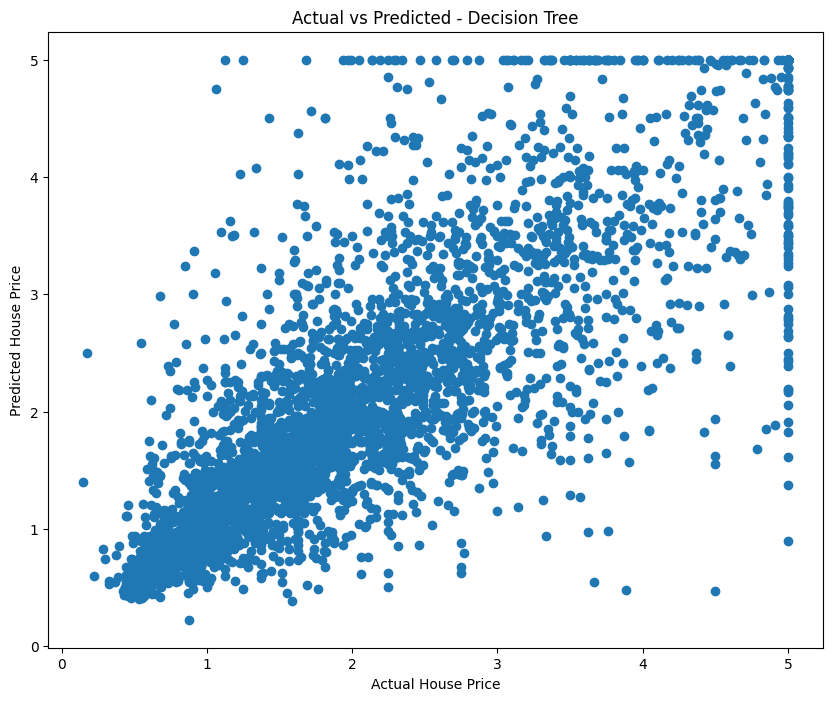

In [28]:
#  Plot: Actual vs Predicted (Best Model)
best_model.fit(X_train_scaled, y_train)
y_best_pred = best_model.predict(X_test_scaled)
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_best_pred)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title(f"Actual vs Predicted - {best_model_name}")
plt.show()


In [29]:
# Save Best Model + Scaler
joblib.dump(best_model, "best_model.joblib")
joblib.dump(scaler, "scaler.joblib")
print("\nSaved files:")
print("- best_model.joblib")
print("- scaler.joblib")


Saved files:
- best_model.joblib
- scaler.joblib


In [30]:
# Quick Example: Predict on New Data
example_row = X_test.iloc[[0]] 
example_row_scaled = scaler.transform(example_row)
example_prediction = best_model.predict(example_row_scaled)[0]
print("\nExample prediction for one sample:", example_prediction)
print("Actual value for that sample:", y_test.iloc[0])


Example prediction for one sample: 0.414
Actual value for that sample: 0.477
